### Loan Approval Prediction Using Machine Learning 

This notebook looks into using machine learning and data science libraries in as attempt to build a machine learning model capable of predicting whether or not a loan should be approved based on their financial history

### Prepare the Tools

In [1]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Models for scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import RocCurveDisplay

### Load Data 

In [2]:
df = pd.read_csv("data/loan_approval_prediction/train.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
df.shape

(58645, 13)

In [6]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.loan_status.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

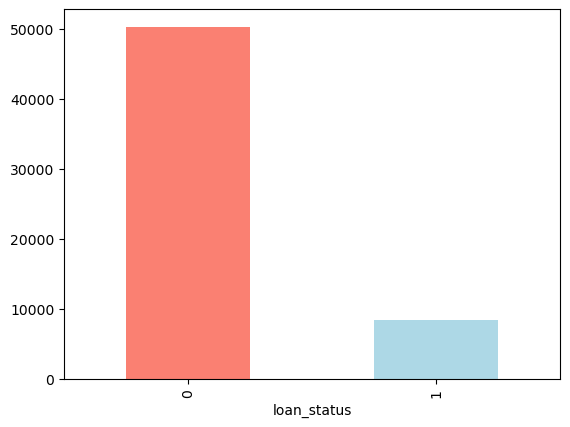

In [8]:
df.loan_status.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

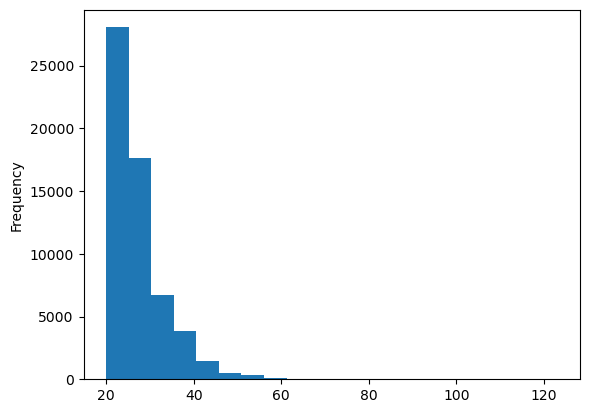

In [14]:
# check the age distribution with Histograph 
df['person_age'].plot.hist(bins = 20);

In [12]:
# Split the train data into feature variables(X) and Label(y) 
X_train = df.drop("loan_status", axis=1)
y_train = df.loan_status

In [13]:
X_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [15]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [16]:
len(X_train), len(y_train)

(58645, 58645)

In [17]:
X_train.shape, y_train.shape

((58645, 12), (58645,))

### We'll balance the data set using SMOTE

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [21]:
df_test = pd.read_csv("data/loan_approval_prediction/test.csv")
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [22]:
df_test.shape

(39098, 12)

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [24]:
df_test.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [25]:
X_test = df_test

In [26]:
# convert the caterogical features to number using one hot encoder 
from sklearn.preprocessing import OneHotEncoder      
from sklearn.compose import ColumnTransformer 

one_hot = OneHotEncoder()
categorical_features =["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
transformer = ColumnTransformer([("one_hot", 
                                one_hot,
                               categorical_features)], 
                               remainder= "passthrough") 
transformed_X_train = transformer.fit_transform(X_train) 
transformed_X_test = transformer.transform(X_test) 

transformed_X_train

array([[ 0.  ,  0.  ,  0.  , ..., 11.49,  0.17, 14.  ],
       [ 0.  ,  0.  ,  1.  , ..., 13.35,  0.07,  2.  ],
       [ 0.  ,  0.  ,  1.  , ...,  8.9 ,  0.21, 10.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 16.  ,  0.15,  2.  ],
       [ 0.  ,  0.  ,  0.  , ...,  8.9 ,  0.17,  3.  ],
       [ 1.  ,  0.  ,  0.  , ..., 11.11,  0.2 ,  5.  ]])

In [27]:
transformed_X_test

array([[ 0.  ,  0.  ,  0.  , ..., 15.76,  0.36,  2.  ],
       [ 1.  ,  0.  ,  0.  , ..., 12.68,  0.1 ,  4.  ],
       [ 0.  ,  0.  ,  0.  , ..., 17.19,  0.13,  2.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  7.51,  0.25, 25.  ],
       [ 1.  ,  0.  ,  0.  , ..., 15.62,  0.39,  4.  ],
       [ 0.  ,  0.  ,  0.  , ...,  9.91,  0.44,  9.  ]])

In [28]:
pd.DataFrame(transformed_X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,37.0,35000.0,0.0,6000.0,11.49,0.17,14.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,22.0,56000.0,6.0,4000.0,13.35,0.07,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,29.0,28800.0,8.0,6000.0,8.90,0.21,10.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,70000.0,14.0,12000.0,11.11,0.17,5.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,22.0,60000.0,2.0,6000.0,6.92,0.10,3.0


In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(transformed_X_train, y_train)

In [33]:
print("After SMOTE:", Counter(y_train_resampled))


After SMOTE: Counter({0: 50295, 1: 50295})


In [34]:
print("Before SMOTE:", Counter(y_train))


Before SMOTE: Counter({0: 50295, 1: 8350})


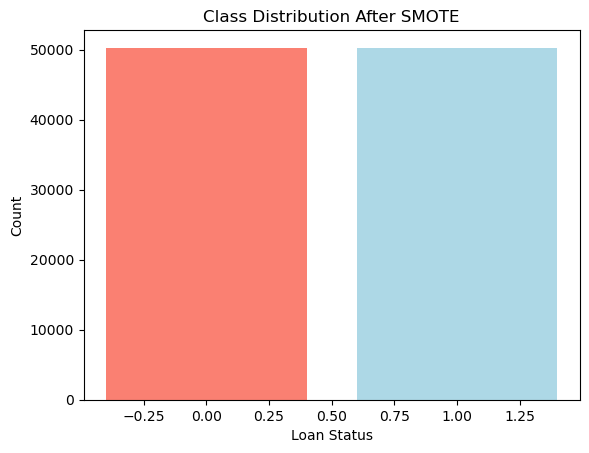

In [35]:
import matplotlib.pyplot as plt
Counter(y_train_resampled).values()
plt.bar(Counter(y_train_resampled).keys(), Counter(y_train_resampled).values(), color=['salmon', 'lightblue'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

### Modelling

In [36]:
# Instantiate the models
model = GradientBoostingClassifier()

# fit the mmodel
model.fit(X_train_resampled, y_train_resampled)   

GradientBoostingClassifier()

In [37]:
# Evaluate the mmodel 
model.score(X_train_resampled, y_train_resampled)

0.963574908042549

In [38]:
# make prediction 
y_pred = model.predict(transformed_X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)